In [7]:
import os
import math
from sympy import *
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit, least_squares
from lmfit import minimize, Minimizer, Parameters, Parameter, report_fit
import matplotlib.pyplot as plt
import lmfit


In [8]:
def load_csv_data(file_name, subdir=''):
    """
    Loads data from .csv file in to DataFrame

    :param file_name: .csv file name in string
    :param subdir: optional parameter to specify the subdirectory of the file
    :return: extracted data in DataFrame
    """

    file_dir = os.path.realpath('../')
    print(file_dir)
    for root, dirs, files in os.walk(file_dir):
        if root.endswith(subdir):
            for name in files:
                if name == file_name:
                    file_path = os.path.join(root, name)

    df = pd.read_csv(file_path)

    return df

In [95]:
def LF_Noise():
    """ Inital parameters and bounds for each paramter according to LF (0-0.01Hz)in the paper
    """
    LMparams = Parameters()
    LMparams.add('A1_FS', value = 1.)#, min = -10, max = 10)
    LMparams.add('A2_FS', value = 1.)#, min = -10, max = 10)
    LMparams.add('A3_FS', value = 1.)#, min = -10, max = 10)
    LMparams.add('w1_FS', value = 0, min = 0, max = 0.01*2*math.pi)
    LMparams.add('w2_FS', value = 0.005*2*math.pi, min = 0, max = 0.01*2*math.pi)
    LMparams.add('w3_FS', value = 0.01*2*math.pi, min = 0, max = 0.01*2*math.pi)
    LMparams.add('gamma1_FS', value = 0, min = -math.pi, max = math.pi)
    LMparams.add('gamma2_FS', value = 0, min = -math.pi, max = math.pi)
    LMparams.add('gamma3_FS', value = 0, min = -math.pi, max = math.pi)

    return LMparams

def MF_Noise():
    """ Inital parameters and bounds for each paramter according to MF (0.01-0.25Hz) in the paper
    """
    LMparams = Parameters()
    LMparams.add('A1_FS', value = 1.)#, min = -10, max = 10)
    LMparams.add('A2_FS', value = 1.)#, min = -10, max = 10)
    LMparams.add('A3_FS', value = 1.)#, min = -10, max = 10)
    LMparams.add('w1_FS', value = 0.03*2*math.pi, min = 0.01*2*math.pi, max = 0.25*2*math.pi)
    LMparams.add('w2_FS', value = 0.13*2*math.pi, min = 0.01*2*math.pi, max = 0.25*2*math.pi)
    LMparams.add('w3_FS', value = 0.25*2*math.pi, min = 0.01*2*math.pi, max = 0.25*2*math.pi)
    LMparams.add('gamma1_FS', value = 0, min = -math.pi, max = math.pi)
    LMparams.add('gamma2_FS', value = 0, min = -math.pi, max = math.pi)
    LMparams.add('gamma3_FS', value = 0, min = -math.pi, max = math.pi)

    return LMparams

def HF_Noise():
    """ Inital parameters and bounds for each paramter according to HF (0.25-0.5Hz) in the paper
    """
    LMparams = Parameters()
    LMparams.add('A1_FS', value = 1.)#, min = -10, max = 10)
    LMparams.add('A2_FS', value = 1.)#, min = -10, max = 10)
    LMparams.add('A3_FS', value = 1.)#, min = -10, max = 10)
    LMparams.add('w1_FS', value = 0.25*2*math.pi, min = 0.25*2*math.pi, max = 0.5*2*math.pi)
    LMparams.add('w2_FS', value = 0.375*2*math.pi, min = 0.25*2*math.pi, max = 0.5*2*math.pi)
    LMparams.add('w3_FS', value = 0.5*2*math.pi, min = 0.25*2*math.pi, max = 0.5*2*math.pi)
    LMparams.add('gamma1_FS', value = 0, min = -math.pi, max = math.pi)
    LMparams.add('gamma2_FS', value = 0, min = -math.pi, max = math.pi)
    LMparams.add('gamma3_FS', value = 0, min = -math.pi, max = math.pi)

    return LMparams

In [ ]:
class DS(object):
    """ Module 2: Drive Scenario
    """
    def __init__(self):
        

In [ ]:
class DC(object):
    """ Module 1: Drive Cycle
    """
    def __init__(self, dc_length):
        
        t_DC = dc_length
        sum_t_DS = 0
        while t_DC > sum_t_DS:
            pass
        pass


In [112]:
class DP(object):
    """ Module 3: Drive Pulse
    """
    def __init__(self,t,y):
        # velocity_noise = None
        # accel = None
        # cruise = None
        # decel = None
        # idle = None
        # t_DP = None
        self.t = t
        self.y = y

    def subtract_avg(self):
        """Removes the average speed from the observations
        """
        self.y = self.y - self.y.mean()
        return self.y

    def subtract(self, array):
        self.y = self.y - array
        return self.y
     
    def eqn_model(self, params):
        """ Returns the velocity noise FS model as described in eqn (5)
        """
        # put all the paramters in a list
        A_FS = [params['A1_FS'],params['A2_FS'],params['A3_FS']]
        w_FS = [params['w1_FS'],params['w2_FS'],params['w3_FS']]
        gamma_FS = [params['gamma1_FS'],params['gamma2_FS'],params['gamma3_FS']]

        # equation (5)
        model = A_FS[0] * np.sin( (w_FS[0]*self.t) + gamma_FS[0] )
        model += A_FS[1] * np.sin( (w_FS[1]*self.t) + gamma_FS[1] )
        model += A_FS[2] * np.sin( (w_FS[2]*self.t) + gamma_FS[2] )

        return model

    def fnc2min(self, params):
        """ Returns the residuals (eqn 7) for the model
        """
        return (self.y - self.eqn_model(params))


    def NLLSR(self, LMparams):
        """ Returns the result of the NLLSR using LMFit
        """
        LMFitmin = Minimizer(self.fnc2min, LMparams)
        LMFitResult = LMFitmin.minimize(method='least_squares')
        lmfit.printfuncs.report_fit(LMFitResult.params)

        return LMFitResult

    



/Users/koeboonshyang/Documents/GitHub/MEng-V2I


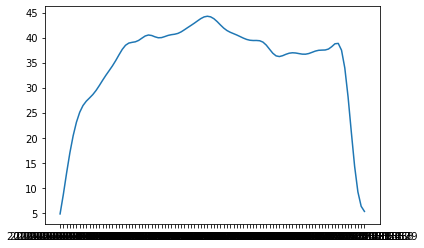

[[Variables]]
    A1_FS:     -330.576884 +/- 104449.963 (31596.27%) (init = 1)
    A2_FS:     -407.715150 +/- 3687369.93 (904398.56%) (init = 1)
    A3_FS:      241.626011 +/- 5672142.26 (2347488.27%) (init = 1)
    w1_FS:      0.01903851 +/- 219.095500 (1150801.68%) (init = 0)
    w2_FS:      0.05169023 +/- 179.227634 (346734.09%) (init = 0.03141593)
    w3_FS:      0.06283185 +/- 81.8584589 (130281.79%) (init = 0.06283185)
    gamma1_FS: -0.62974662 +/- 7251.92472 (1151562.31%) (init = 0)
    gamma2_FS:  1.42774091 +/- 5979.38990 (418800.77%) (init = 0)
    gamma3_FS:  1.05500045 +/- 2747.33941 (260411.21%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(A2_FS, gamma3_FS)     = -1.000
    C(A2_FS, w3_FS)         =  1.000
    C(A3_FS, gamma2_FS)     = -1.000
    C(A3_FS, w2_FS)         =  1.000
    C(A2_FS, A3_FS)         = -1.000
    C(w3_FS, gamma2_FS)     =  1.000
    C(w3_FS, gamma3_FS)     = -1.000
    C(w1_FS, gamma1_FS)     = -1.000
    C(w2_FS, gamma2_F

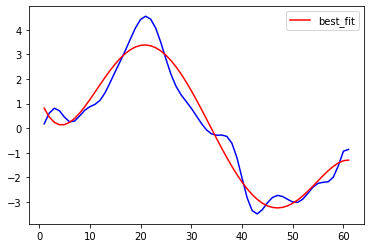

In [113]:
if __name__ == '__main__':
    LMparams = LF_Noise()

    # loads the csv file
    subdir = 'caltrans_processed_drive_cycles/data/1035198_1'
    file_name = '2012-05-22.csv'
    data = load_csv_data(file_name, subdir)
    # get a slice of the data with a relatively long driving pulse
    data = data.iloc[1002:1096,:]
    plt.plot(data.loc[:,'timestamp'], data.loc[:,'speed_mph'])
    plt.show()
    # get the slice of ONLY cruising period
    cruising_data = data.iloc[25:86,:]

    # create a numpy array of just t values starting at t=1
    t = np.linspace(1,len(cruising_data),len(cruising_data))
    # create a numpy array of speed_mph values
    y = cruising_data.loc[:,'speed_mph'].to_numpy()
    # initialise the DP object
    dp_obj = DP(t,y)
    # deduct the average from the cruising period speed values (from fig3a to fig3b) and store as y
    y = dp_obj.subtract_avg()

    # perform NLLSR with the initial parameters suggested by LMParams
    hi = dp_obj.NLLSR(LMparams)


    plt.plot(t,y,'b')
    yy = hi.params['A1_FS'] * np.sin( (hi.params['w1_FS']*t) + hi.params['gamma1_FS'])
    yy = yy + hi.params['A2_FS'] * np.sin( (hi.params['w2_FS']*t) + hi.params['gamma2_FS'])
    yy = yy + hi.params['A3_FS'] * np.sin( (hi.params['w3_FS']*t) + hi.params['gamma3_FS'])
    plt.plot(t, yy,'r', label = 'best_fit')
    plt.legend(loc='best')
    plt.show()





[[Variables]]
    A1_FS:     -0.04459549 +/- 0.10280440 (230.53%) (init = 1)
    A2_FS:     -0.14665474 +/- 0.10095503 (68.84%) (init = 1)
    A3_FS:     -0.04438018 +/- 0.10057019 (226.61%) (init = 1)
    w1_FS:      0.16852194 +/- 0.12159297 (72.15%) (init = 0.1884956)
    w2_FS:      0.87901026 +/- 0.03918552 (4.46%) (init = 0.8168141)
    w3_FS:      1.54168993 +/- 0.12993955 (8.43%) (init = 1.570796)
    gamma1_FS: -3.14159262 +/- 4.54320365 (144.61%) (init = 0)
    gamma2_FS:  1.99669561 +/- 1.37761874 (68.99%) (init = 0)
    gamma3_FS: -0.27016948 +/- 4.66424787 (1726.42%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(w3_FS, gamma3_FS) = -0.874
    C(w1_FS, gamma1_FS) = -0.872
    C(w2_FS, gamma2_FS) = -0.867
    C(w2_FS, w3_FS)     = -0.114
    C(w2_FS, gamma3_FS) =  0.101
    C(w3_FS, gamma2_FS) =  0.101


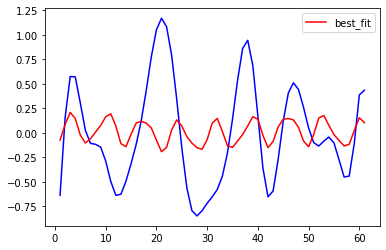

In [114]:
LMparams = MF_Noise()
y = dp_obj.subtract(dp_obj.eqn_model(hi.params))
# perform NLLSR with the initial parameters suggested by LMParams
hi2 = dp_obj.NLLSR(LMparams)

plt.plot(t,y,'b')
yy = hi2.params['A1_FS'] * np.sin( (hi2.params['w1_FS']*t) + hi2.params['gamma1_FS'])
yy = yy + hi2.params['A2_FS'] * np.sin( (hi2.params['w2_FS']*t) + hi2.params['gamma2_FS'])
yy = yy + hi2.params['A3_FS'] * np.sin( (hi2.params['w3_FS']*t) + hi2.params['gamma3_FS'])
plt.plot(t, yy,'r', label = 'best_fit')
plt.legend(loc='best')
plt.show()

[[Variables]]
    A1_FS:      0.02310853 (init = 1)
    A2_FS:     -0.05909787 (init = 1)
    A3_FS:      0.99876232 (init = 1)
    w1_FS:      2.99784150 (init = 1.570796)
    w2_FS:      2.35048803 (init = 2.356194)
    w3_FS:      3.14159265 (init = 3.141593)
    gamma1_FS:  0.29559748 (init = 0)
    gamma2_FS:  0.24625374 (init = 0)
    gamma3_FS:  0.02503899 (init = 0)


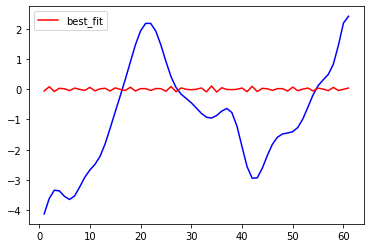

In [111]:
LMparams = HF_Noise()
y = dp_obj.subtract(dp_obj.eqn_model(hi.params))
# perform NLLSR with the initial parameters suggested by LMParams
hi = dp_obj.NLLSR(LMparams)

plt.plot(t,y,'b')
yy = hi.params['A1_FS'] * np.sin( (hi.params['w1_FS']*t) + hi.params['gamma1_FS'])
yy = yy + hi.params['A2_FS'] * np.sin( (hi.params['w2_FS']*t) + hi.params['gamma2_FS'])
yy = yy + hi.params['A3_FS'] * np.sin( (hi.params['w3_FS']*t) + hi.params['gamma3_FS'])
plt.plot(t, yy,'r', label = 'best_fit')
plt.legend(loc='best')
plt.show()